# Feature Engineering
# Klassifikation
# Regression
# Validierung und mehr
## Sampling und Resampling
## Validierungstechniken
## Grid Search und Random Search

In [2]:
## preparation

## import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

## load data
datapath = '../3_data'
from os import chdir
chdir(datapath)

from bfh_cas_pml import prep_data
X_train, X_test, y_train, y_test = prep_data(
    'bank_data_prep.csv', 'y', seed=1234)
#X_demo, y_demo = prep_demo_data('demo_data_class.csv', 'y')

### Rekapitulation Parameter Tuning

C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


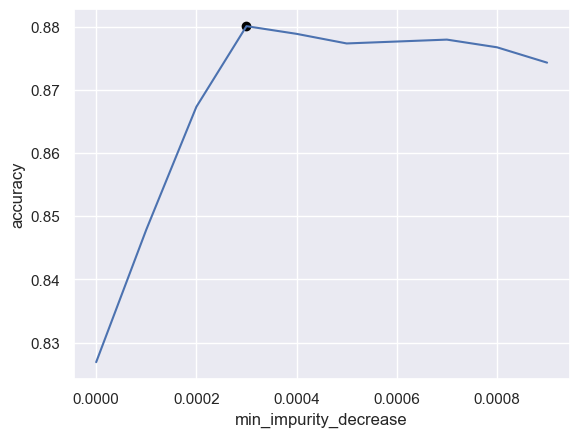

In [4]:
## recap parameter tuning for DecisionTreeClassifier in 2.2.1.5
## min_impurity_decrease from 0 to 0.001 in steps 0.0001

from sklearn.tree import DecisionTreeClassifier
scores = []
params = np.arange(0, 0.001, 0.0001) 
for param in params:
    model = DecisionTreeClassifier(min_impurity_decrease = param)
    model.fit(X_train, y_train) 
    score = model.score(X_test, y_test)
    scores.append(score)

fig = sns.lineplot(x=params, y=scores)
plt.scatter(x=params[scores.index(max(scores))], y=max(scores), color="black")
plt.xlabel('min_impurity_decrease')
plt.ylabel('accuracy');

C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\werne\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


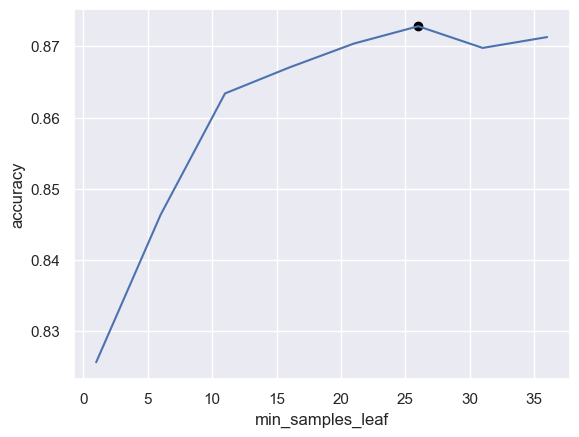

In [5]:
## and another interesting parameter: min_samples_leaf
scores = []
params = range(1, 41, 5) 
for param in params:
    model = DecisionTreeClassifier(min_samples_leaf = param)
    model.fit(X_train, y_train) 
    score = model.score(X_test, y_test)
    scores.append(score)

fig = sns.lineplot(x=params, y=scores)
plt.scatter(x=params[scores.index(max(scores))], y=max(scores), color="black")
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy');

### Grid Search mit CV
#### Mit einem Parameter

In [7]:
## construction of a parameter grid
params = {'min_impurity_decrease': np.arange(0, 0.001, 0.0001)}
print(type(params))
print(params)

<class 'dict'>
{'min_impurity_decrease': array([0.    , 0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007,
       0.0008, 0.0009])}


In [8]:
## using the defined parameter grid
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': np.arange(0, 0.001, 0.0001)}
model = DecisionTreeClassifier(random_state=1234)
gscv = GridSearchCV(model, param_grid=params, cv=10)
gscv.fit(X_train, y_train)
cv_results = pd.DataFrame(gscv.cv_results_)

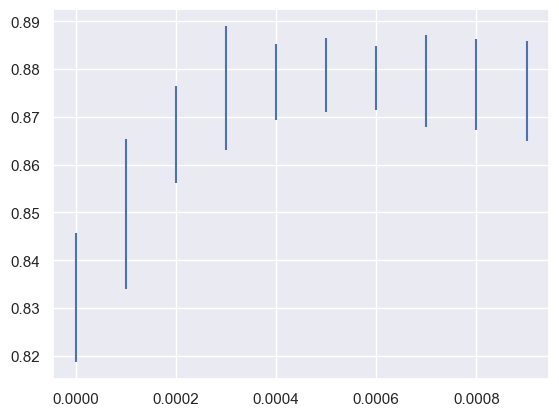

In [9]:
plt.errorbar(
    'param_min_impurity_decrease', 
    'mean_test_score', 
    'std_test_score', 
    data = cv_results, linestyle='None');

In [10]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_impurity_decrease,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.086996,0.007234,0.001877,0.004697,0.0,{'min_impurity_decrease': 0.0},0.820669,0.817629,0.823708,0.838661,0.837139,0.814307,0.850837,0.852359,0.844749,0.821918,0.832198,0.013493,10
1,0.070750,0.008064,0.007859,0.007031,0.0001,{'min_impurity_decrease': 0.0001},0.831307,0.822188,0.854103,0.873668,0.850837,0.841705,0.853881,0.875190,0.844749,0.849315,0.849694,0.015640,9
2,0.075083,0.012904,0.004189,0.005029,0.0002,{'min_impurity_decrease': 0.0002},0.855623,0.858663,0.873860,0.885845,0.866058,0.869102,0.861492,0.879756,0.856925,0.855403,0.866273,0.010150,8
3,0.058564,0.008421,0.006554,0.007195,0.0003,{'min_impurity_decrease': 0.00030000000000000003},0.866261,0.863222,0.887538,0.890411,0.878234,0.875190,0.866058,0.902588,0.870624,0.859970,0.876010,0.013024,6
4,0.056662,0.003649,0.004618,0.004108,0.0004,{'min_impurity_decrease': 0.0004},0.873860,0.870821,0.882979,0.893455,0.869102,0.882801,0.870624,0.885845,0.872146,0.870624,0.877226,0.007957,4
5,0.052555,0.005694,0.004938,0.003969,0.0005,{'min_impurity_decrease': 0.0005},0.876900,0.869301,0.882979,0.893455,0.867580,0.881279,0.884323,0.885845,0.873668,0.872146,0.878747,0.007803,1
6,0.047989,0.001399,0.005347,0.004273,0.0006,{'min_impurity_decrease': 0.0006000000000000001},0.876900,0.867781,0.882979,0.890411,0.870624,0.884323,0.881279,0.881279,0.873668,0.872146,0.878139,0.006732,2
7,0.042612,0.004312,0.007561,0.006096,0.0007,{'min_impurity_decrease': 0.0007},0.876900,0.866261,0.886018,0.890411,0.864536,0.888889,0.878234,0.887367,0.869102,0.867580,0.877530,0.009646,3
8,0.048925,0.006122,0.006103,0.005538,0.0008,{'min_impurity_decrease': 0.0008},0.872340,0.866261,0.886018,0.891933,0.864536,0.888889,0.876712,0.882801,0.870624,0.867580,0.876769,0.009490,5
9,0.046720,0.003631,0.005003,0.003044,0.0009,{'min_impurity_decrease': 0.0009000000000000001},0.872340,0.866261,0.886018,0.887367,0.864536,0.888889,0.879756,0.879756,0.855403,0.873668,0.875400,0.010439,7


#### Mit mehr als einem Parameter

In [12]:
## combination of more than one parameter
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': np.arange(0.0002, 0.001, 0.0002),
          'min_samples_leaf': range(5, 25, 5)}

model = DecisionTreeClassifier(random_state=1234)
gscv = GridSearchCV(model, param_grid=params, cv=10)
gscv.fit(X_train, y_train)

## the pivot table (as pandas data frame)
cv_results = pd.pivot_table(pd.DataFrame(gscv.cv_results_),
    values='mean_test_score', 
    index='param_min_impurity_decrease', 
    columns='param_min_samples_leaf')
print(cv_results)

param_min_samples_leaf             5         10        15        20
param_min_impurity_decrease                                        
0.0002                       0.870532  0.871142  0.870684  0.873724
0.0004                       0.874791  0.875857  0.875857  0.876616
0.0006                       0.877986  0.878443  0.877835  0.879507
0.0008                       0.876769  0.876162  0.875401  0.877226


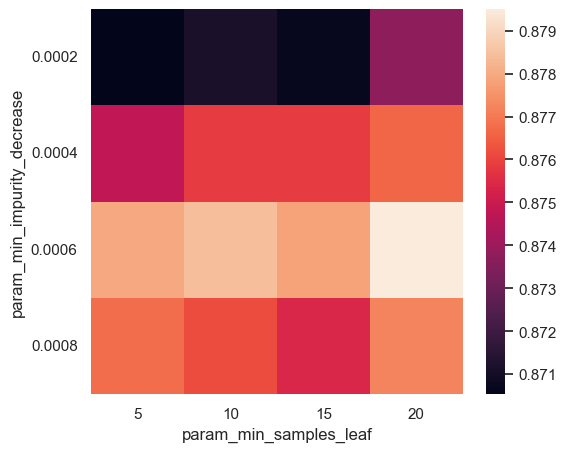

In [13]:
## format y labels
plt.subplots(figsize=(6, 5))   
g = sns.heatmap(cv_results)
ylabels = ['{:,.4f}'.format(x) for x in cv_results.index]
g.set_yticklabels(ylabels);

In [14]:
## the most important attributes
print('best_params_ :', gscv.best_params_)
print('best_score_  :', gscv.best_score_)
print('refit_time_  :', gscv.refit_time_)

best_params_ : {'min_impurity_decrease': 0.0006000000000000001, 'min_samples_leaf': 20}
best_score_  : 0.8795073397084472
refit_time_  : 0.03946638107299805


best_params_ : {'min_impurity_decrease': 0.0005, 'min_samples_leaf': 16}
best_score_  : 0.879964654665908
refit_time_  : 0.04746651649475098
CPU times: total: 45.2 s
Wall time: 46.4 s


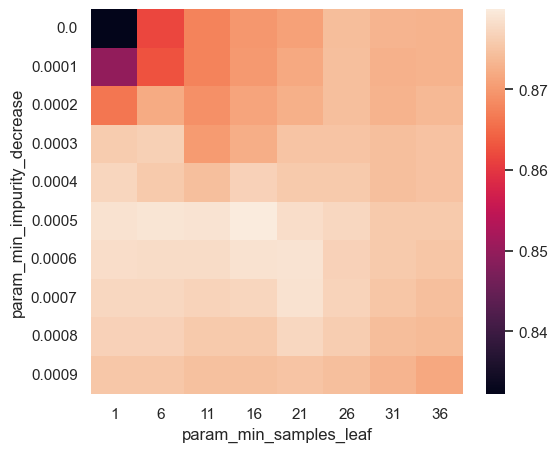

In [15]:
%%time
## the above is a magic command which measures the execution time for the whole cell
## must be in the first line of cell

## a more detailed granularity
from sklearn.model_selection import GridSearchCV
params = {'min_impurity_decrease': np.arange(0, 0.001, 0.0001),
          'min_samples_leaf': range(1, 41, 5)}
model = DecisionTreeClassifier(random_state=1234)
gscv = GridSearchCV(model, param_grid=params, cv=10)
gscv.fit(X_train, y_train)

## pivot table and heatmap
cv_results = pd.pivot_table(pd.DataFrame(gscv.cv_results_),
    values = 'mean_test_score', 
    index = 'param_min_impurity_decrease', 
    columns = 'param_min_samples_leaf')
#print(cv_results)

plt.figure(figsize=(6,5))
sns.heatmap(cv_results,
            yticklabels=cv_results.index.values.round(4));

## the most important attributes
print('best_params_ :', gscv.best_params_)
print('best_score_  :', gscv.best_score_)
print('refit_time_  :', gscv.refit_time_)

### Random Search mit CV

best_params_ : {'min_samples_leaf': 1, 'min_impurity_decrease': 0.0006000000000000001}
best_score_  : 0.8781388646005377
CPU times: total: 11.6 s
Wall time: 12.1 s


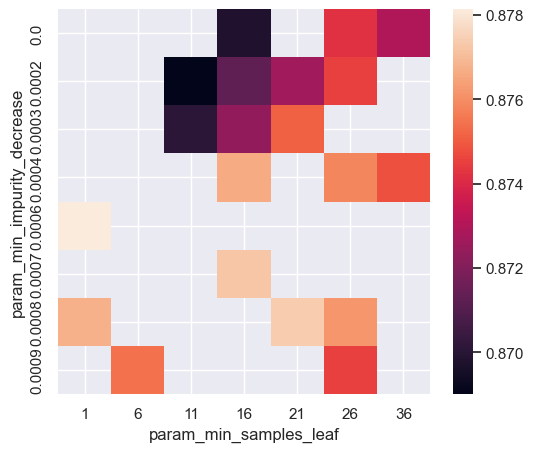

In [17]:
%%time

## limitation of the above to 20 randomly chosen combinations
from sklearn.model_selection import RandomizedSearchCV
params = {'min_impurity_decrease': np.arange(0, 0.001, 0.0001),
          'min_samples_leaf': range(1, 41, 5)}
model = DecisionTreeClassifier(random_state=1234)
rscv = RandomizedSearchCV(
    model, 
    param_distributions=params, 
    cv=10, ## default: 5
    n_iter=20) ## default: 10
rscv.fit(X_train, y_train)

## pivot table and heatmap
plt.figure(figsize=(6,5))
cv_results = pd.pivot_table(pd.DataFrame(rscv.cv_results_),
    values='mean_test_score', 
    index='param_min_impurity_decrease', 
    columns='param_min_samples_leaf')
sns.heatmap(cv_results,
            yticklabels=cv_results.index.values.round(4));

## the most important attributes
print('best_params_ :', rscv.best_params_)
print('best_score_  :', rscv.best_score_)

define a distribution instead of a grid

In [19]:
%%time

from scipy.stats.distributions import uniform
params = {
    'max_depth': range(1, 101),
    'min_samples_leaf': range(1, 21),
    'min_impurity_decrease': uniform(0, 0.001) ## instead of np.arange()
}

model = DecisionTreeClassifier(random_state=1234)
rscv = RandomizedSearchCV(
    model, 
    param_distributions=params, 
    cv=5,
    n_iter=20) ## default: 10
rscv.fit(X_train, y_train)

#print('best_estimator_ :', rscv.best_estimator_)
print('best_params_ :', rscv.best_params_)
print('best_score_     :', rscv.best_score_)

best_params_ : {'max_depth': 67, 'min_impurity_decrease': 0.0007429401580972144, 'min_samples_leaf': 11}
best_score_     : 0.8810271368300432
CPU times: total: 5.19 s
Wall time: 5.59 s
